# dermis_subset

In [1]:
import scanpy as sc, numpy as np, pandas as pd
import scvi
scvi.settings.seed = 11

Global seed set to 0
Global seed set to 11


In [2]:
from matplotlib.pyplot import rc_context
from matplotlib import pyplot as plt

In [3]:
import torch
print(torch.cuda.is_available())

True


## Subset re-integration & re-training

In [4]:
adata = sc.read_h5ad("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221212.dermis.adata_lognorm.raw(copy).e13_pd4.concatenated.gene1000.mt7.5.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 44416 × 24558
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-9', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'leiden_scVI_0.9_colors'

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata

AnnData object with n_obs × n_vars = 44416 × 21979
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-9', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'leiden_scVI_0.9_colors'

In [8]:
adata.layers["counts"] = adata.X.copy() 

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.raw = adata # freeze the state in `.raw`

In [9]:
adata

AnnData object with n_obs × n_vars = 44416 × 21979
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-9', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'leiden_scVI_0.9_colors'

In [10]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=5500,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="batch"
)

/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [11]:
#adata.write("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221212.dermis.renorm.raw(copy).e13_pd4.concatenated.hvg5500.gene1000.mt7.5.h5ad")

In [12]:
adata = sc.read("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221212.dermis.renorm.raw(copy).e13_pd4.concatenated.hvg5500.gene1000.mt7.5.h5ad")

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


In [13]:
scvi.model.SCVI.setup_anndata(adata,
                              layer="counts", batch_key="batch",
                             continuous_covariate_keys=["pct_counts_mt"])                         
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb") #We note that these parameters are non-default; however, they have been verified to generally work well in the integration task.
vae.train()

/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=180 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 180/180: 100%|██████████| 180/180 [22:04<00:00,  7.36s/it, loss=1.9e+03, v_num=1] 


In [14]:
adata.obsm["X_scVI"] = vae.get_latent_representation()

In [15]:
adata.layers["scvi_normalized"] = vae.get_normalized_expression(
    library_size=10e4
)
adata

AnnData object with n_obs × n_vars = 44416 × 5500
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-9', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variab

In [16]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_scVI")

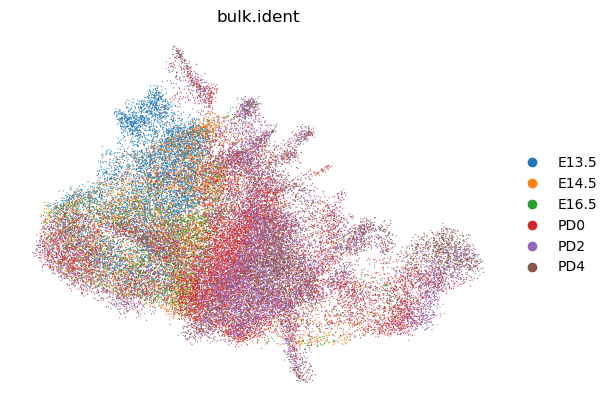

In [17]:
sc.tl.umap(adata, min_dist=0.4, spread =0.4)

sc.pl.umap(
    adata,
    color=["bulk.ident"],
    frameon=False,
)


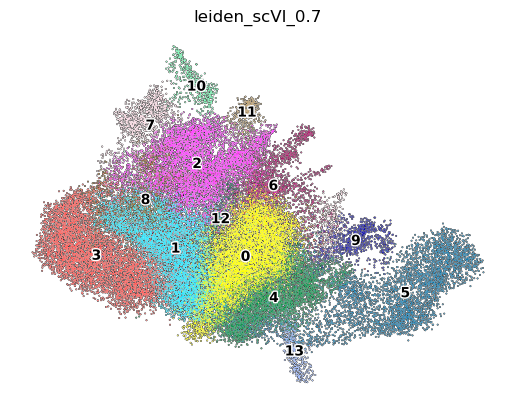

In [18]:
sc.tl.leiden(adata, key_added="leiden_scVI_0.7", resolution=0.7)
sc.pl.umap(
    adata,
    color=["leiden_scVI_0.7"],
    frameon=False, palette=sc.pl.palettes.default_102, add_outline=True, legend_loc='on data',legend_fontoutline=2,
)

In [38]:
# cluster overlay from the original data

In [39]:
X_scVI_clust = pd.read_csv("/data/_90.User_Data/revolvefire/Jupyter/TWIST2_220616/221205_Final/221219.scvi.hvg5500.e13_pd4.min_dist0.4.outputs/dermis.subset.scVI_out.npy.clustering.csv", index_col=0)

In [40]:
adata.obs['from_whole'] = X_scVI_clust['sub_cluster'].astype("category") 

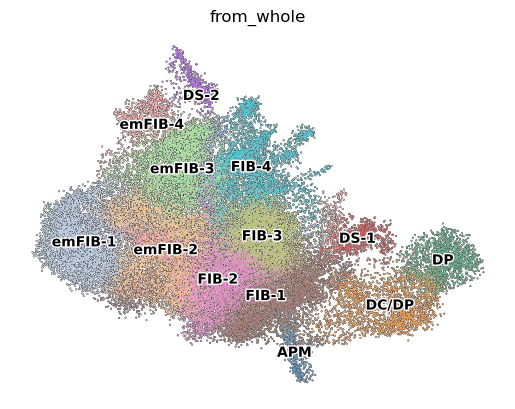

In [41]:
sc.pl.umap(
    adata,
    color=["from_whole"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2, save=("221227.dermis_reintegrated_fromwhole.pdf")
)

In [42]:
#DP, upper, lower fibroblast subcluster

In [43]:
sc.tl.leiden(adata, restrict_to=('leiden_scVI_0.7', ['5']), resolution=0.2, key_added='sub_cluster')

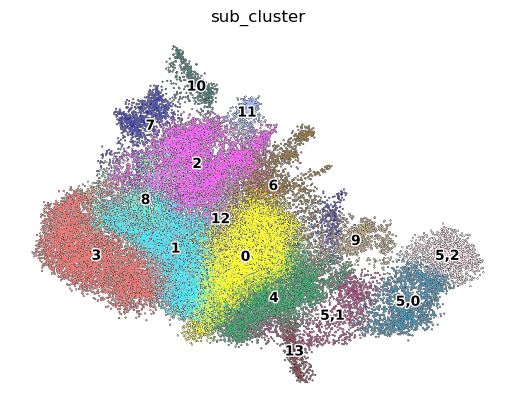

In [44]:
sc.pl.umap(
    adata,
    color=["sub_cluster"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2, palette=sc.pl.palettes.default_102
)

In [45]:
new_cluster_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'
    ]
adata.rename_categories('sub_cluster', new_cluster_names)

/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


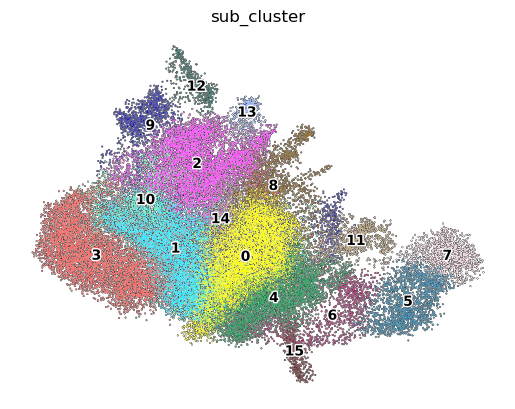

In [46]:
sc.pl.umap(
    adata,
    color=["sub_cluster"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2
)

In [47]:
sc.tl.leiden(adata, restrict_to=('sub_cluster', ['2']), resolution=0.15, key_added='sub_cluster2')

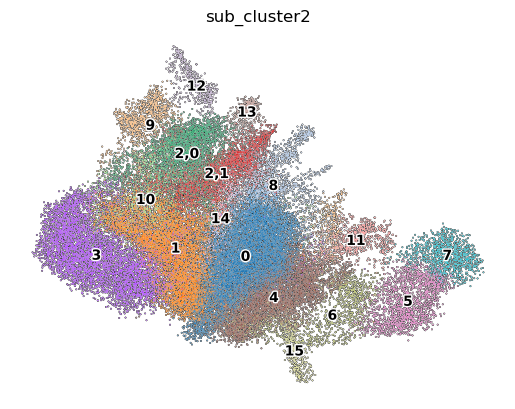

In [48]:
sc.pl.umap(
    adata,
    color=["sub_cluster2"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2
)

In [49]:
sc.tl.leiden(adata, restrict_to=('sub_cluster2', ['0']), resolution=0.3, key_added='sub_cluster3')

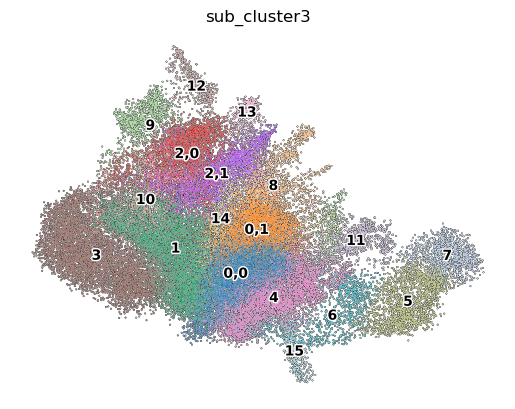

In [50]:
sc.pl.umap(
    adata,
    color=["sub_cluster3"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2, palette=sc.pl.palettes.default_20
)

In [51]:
new_cluster_names = [
    'FIB-2', 'FIB-3', 'emFIB-2', 'emFIB-3', 'FIB-4-1', 'emFIB-1', 'FIB-1', 'DP-1', 'DC', 'DP-2', 'FIB-4-2', 'emFIB-4', 'emFIB2/3', 'DS-1', 'DS-2', 'FIB-4-3', 'FIB-0', 'APM'
    ]
adata.rename_categories('sub_cluster3', new_cluster_names)

/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


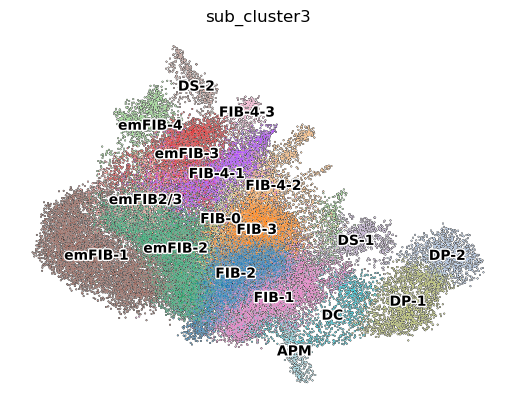

In [52]:
sc.pl.umap(
    adata,
    color=["sub_cluster3"],
    frameon=False, add_outline=True, legend_loc='on data',legend_fontoutline=2, palette=sc.pl.palettes.default_20
)

In [ ]:
#adata.write("230125.testingfurthersubcluster.dermis.subset.adata.REscVIintegrated.h5ad")